# Titanic survived Project

# 1. Introduction

# Problem Statement:

**Project Objective**: Predict whether a passenger survived the Titanic disaster based on various features such as passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare, cabin, and port of embarkation.

**Data Description**:
- Passenger id: Unique identifier for each passenger
- Pclass: Passenger class(1 = 1st class; 2 = 2nd class; 3 = 3rd class)
- Survived: Target variable (0 = No, 1 = Yes)
- Name: Name of the passenger
- Sex: Gender of the passenger (Male or Female)
- Age: Age of the passenger
- Sibsp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Passenger Fare/Price of the ticket
- Cabin:Cabin/Room numbers where the passengers were staying in the ship
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Approach**:
1. Perform data exploration to understand the dataset and identify any missing values or outliers.
2. Preprocess the data by handling missing values, encoding categorical variables, and possibly feature engineering.
3. Select relevant features for prediction and train machine learning models using the training dataset.
4. Evaluate model performance using appropriate metrics.
5. Fine-tune hyperparameters to improve model performance if necessary.
6. Make predictions on the test dataset and deploy the model if performance meets requirements.

Overall, the goal is to build a predictive model that accurately predicts whether a passenger survived the Titanic disaster based on the available features.

# 2. Data Cleaning

# Import important library :

In [3]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [4]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df[510:520]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We're examining both the initial five rows and the final five rows of our complete dataset. Observing a total of 891 rows and 12 columns, we note that the **"survived" column serves as our target label** for predicting survival accuracy, thus framing this as a **classification problem.**

# Exploratory Data Analysis (EDA)

In [9]:
df.shape

(891, 12)

With a quick examination of the columns, it's evident that Passenger ID and Name provide no meaningful input as they solely consist of unique values, rendering them devoid of insights. Consequently, I will proceed to eliminate them before scrutinizing the remaining columns individually.

In [10]:
df=df.drop(['PassengerId','Name'],axis=1)

We've successfully removed the "PassengerId" and "Name" columns from our dataset, as they didn't provide any logical value for predicting survival aboard the sinking ship.

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
missing_val=df.isnull().sum().sort_values(ascending=False)
percentages_missing_val=(missing_val/len(df))*100
print(pd.concat([missing_val,percentages_missing_val],axis=1,keys=['missing_val','% Missing data']))

          missing_val  % Missing data
Cabin             687       77.104377
Age               177       19.865320
Embarked            2        0.224467
Survived            0        0.000000
Pclass              0        0.000000
Sex                 0        0.000000
SibSp               0        0.000000
Parch               0        0.000000
Ticket              0        0.000000
Fare                0        0.000000


Upon inspecting the missing values in our dataset, we find that out of 891 records, there are 177 missing entries in the "Age" column, 687 missing entries in the "Cabin" column, and only 2 missing entries in the "Embarked" column.

Given that the "Cabin" column has the highest number of missing values, constituting close to 80 percent of the overall data, attempting to fill them would be impractical and could introduce bias into the machine learning model toward a specific value.

In [13]:
df=df.drop('Cabin',axis=1)

I've taken the decision to drop the "Cabin" column due to the extensive amount of missing data, which renders manual filling impractical. Since it's not feasible to collect missing data for this column, dropping it ensures that our model predicts the label without bias.

In [14]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
gender_counts = df['Sex'].value_counts()
total_records = len(df)

male_percentage = (gender_counts['male'] / total_records) * 100
female_percentage = (gender_counts['female'] / total_records) * 100

print("Male Percentage:", male_percentage)
print("Female Percentage:", female_percentage)


Male Percentage: 64.75869809203144
Female Percentage: 35.24130190796858


# Filling the missing values

In [16]:
df['Age'].fillna(df['Age'].median(),inplace=True)

 I've incorporated the average years data into the age column of our dataset.

In [17]:
df['Embarked'].fillna('S',inplace=True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<Axes: >

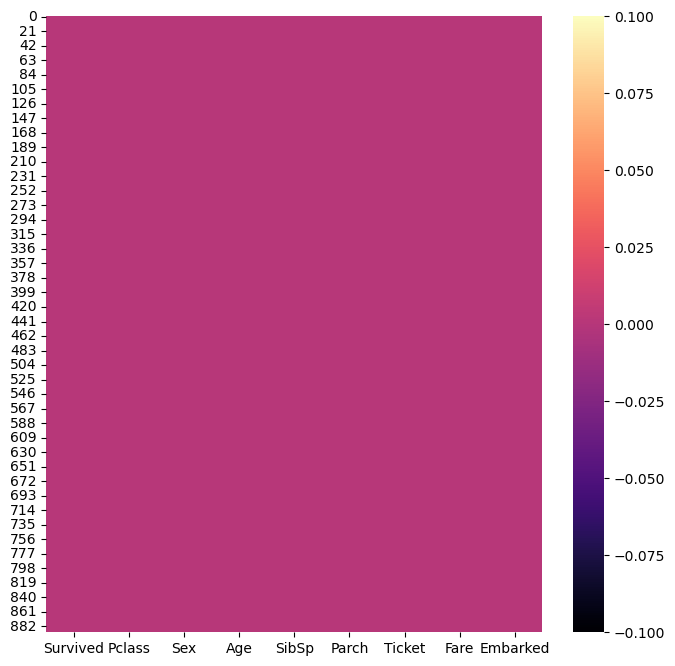

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cmap = 'magma')

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


We have two columns with float values "float64(2)", four columns with integer values "int64(4)", and three columns with categorical (object) data "object(3)". Since categorical data cannot be directly used in machine learning models, we'll need to check if they provide meaningful information and encode them into numerical format for model training.

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the numerical columns. 
The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following:-

1.The counts of all the columns are same which means there are no missing values in the dataset.

2.After checking with the describe method, I found big gaps between the 75th percentile and the maximum values in the 'Fare'  columns. This gaps suggest the presence of outliers in our dataset, which might affect model accuracy later on.

3.The mean survival rate among passengers is approximately 38%, suggesting that about 38% of the passengers in the dataset survived the Titanic disaster.

4.Passenger ages range from 0.42 to 80 years, with a mean age of approximately 29.36 years. The majority of passengers fall within the range of 22 to 35 years, as indicated by the interquartile range.

5.Approximately 64.76% of the passengers are male (encoded as 1), while around 35.24% are female (encoded as 0). This indicates a male majority among the passengers in the dataset.

In [23]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

Observations:

- 'Survived': Target/Label column consists of 2 categories/classes.
- 'Sex': Feature column consists of 2 categories/classes.
- 'Pclass': Feature column consists of 2 categories/classes.
- 'Embarked': Feature column consists of 3 categories/classes.
- 'SibSp': Feature column consists of 7 discrete values.
- 'Parch': Feature column consists of 7 discrete values.

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
549+342

891

In [26]:
df.shape

(891, 9)

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [29]:
df['Embarked'].unique()

array([2, 0, 1])

In [30]:
df.shape

(891, 9)

In [31]:
df['Ticket'].nunique()

681

'Ticket' is typically considered an identifier or non-predictive feature that doesn't contain relevant information for predicting the target variable. Removing irrelevant or non-predictive features simplifies the model and reduces the risk of overfitting.

In [32]:
df=df.drop(['Ticket'],axis=1)

In [33]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [34]:
df['Sex'].unique

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32>

# 3. Data Visualization

# Histogram


**We will create a histogram to visually represent the distribution of the data within the dataset's columns containing continuous values.**

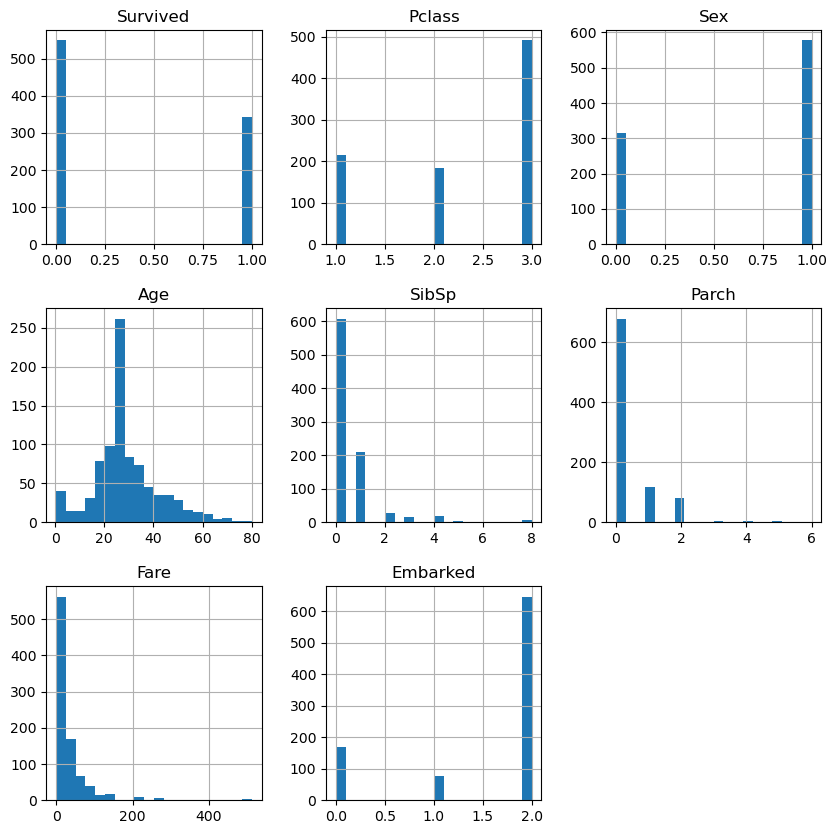

In [35]:
df.hist(bins=20,figsize=(10,10))
plt.show()

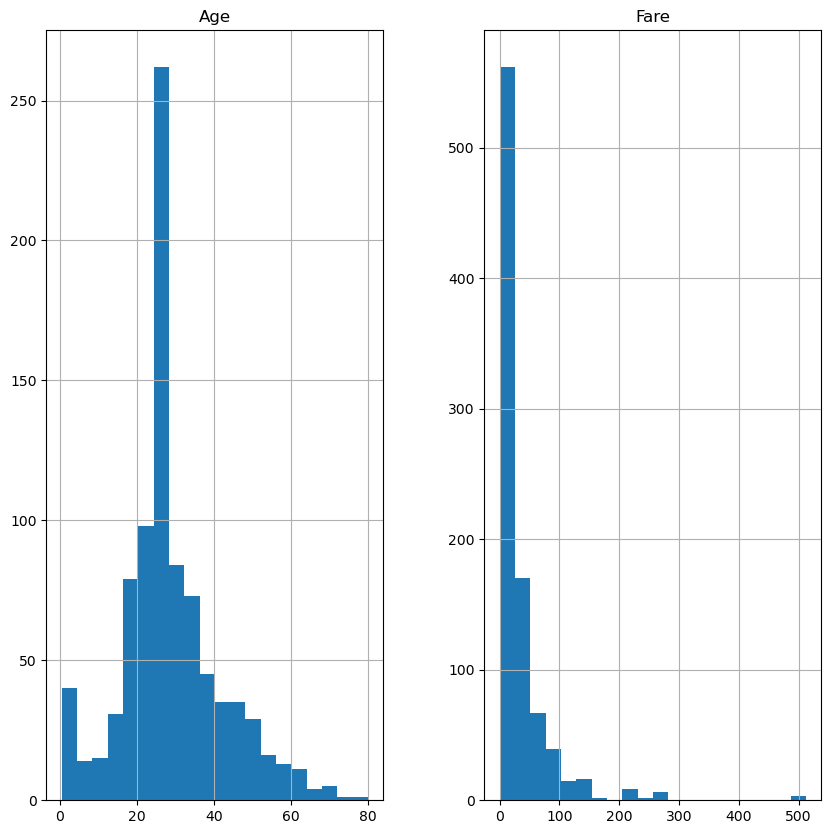

In [36]:
df[['Age','Fare']].hist(bins=20, figsize=(10, 10))
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


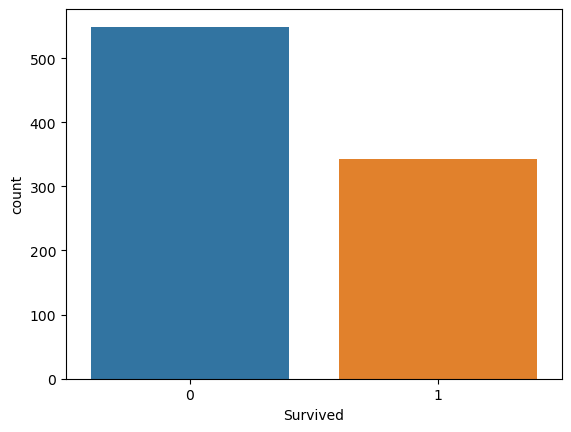

In [37]:
ax =sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

# countplot

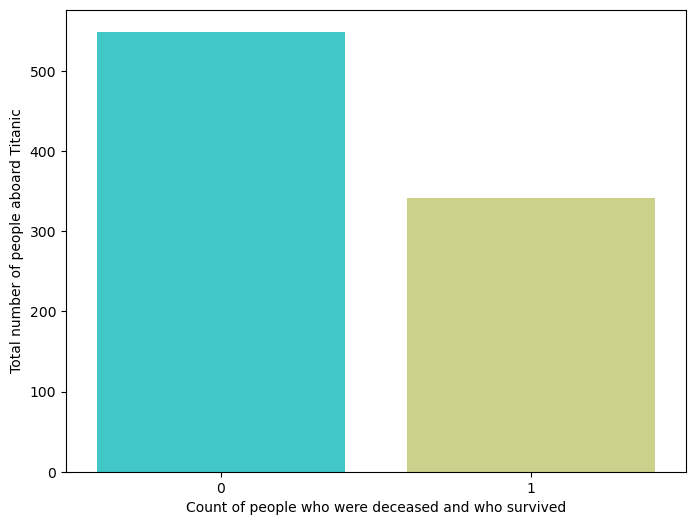

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=df, palette='rainbow')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the count plot above, 0 represents the number of people who drowned when the Titanic sank, while 1 depicts those who survived the sinking. It's evident that a larger number of people drowned during the Titanic sinking, with survivors being comparatively fewer in number.

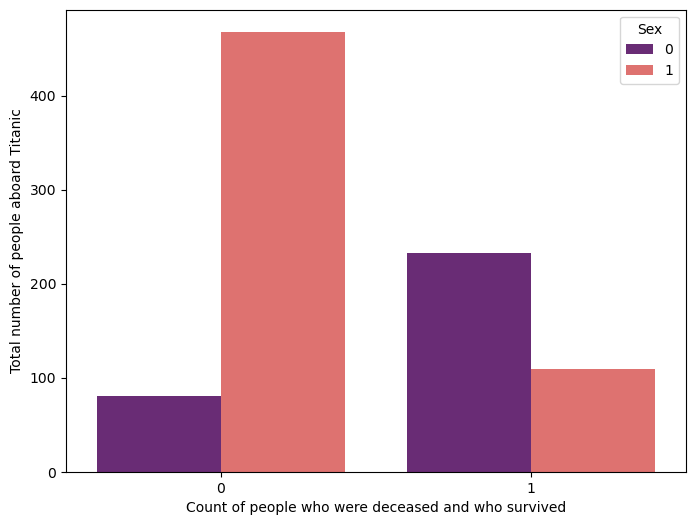

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=df,hue='Sex',palette='magma')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Including the 'Sex' column provides a visual representation of how more men died compared to women. This observation aligns with the historical fact that during the Titanic disaster, rescue operations prioritized lifeboat usage for women and children.

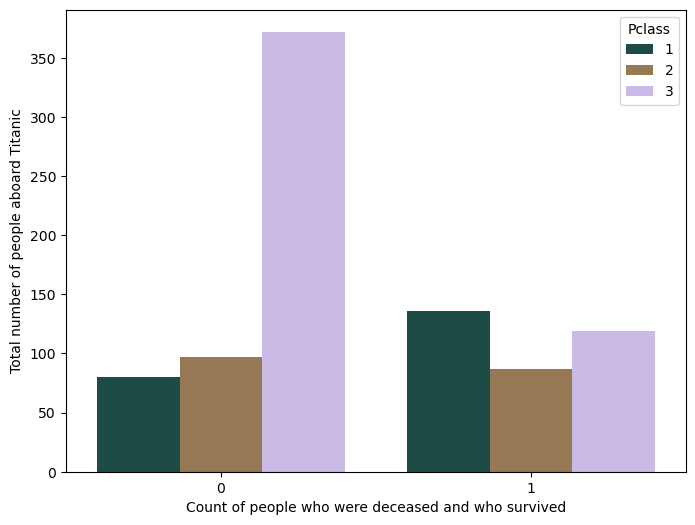

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Survived', data = df, hue='Pclass', palette="cubehelix")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Passengers in class 3 experienced the highest number of deaths, as rescue efforts prioritized passengers from higher classes. By the time class 3 passengers were rescued, resources were depleted and the Titanic was nearly submerged.

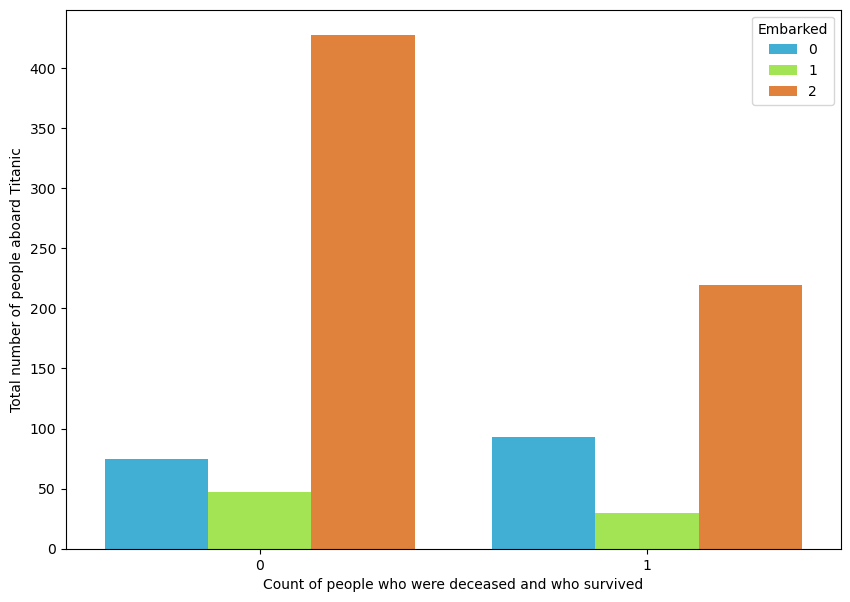

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Embarked', palette="turbo")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Taking a look at the embarked data it looks like the port where the passengers embarked the Titanic has very less to offer but definitely indicates that it still has inputs in terms of folks traveling from S=Southampton have died the most than they survived.

# Bar Chart

Bar Chart for Categorical Features
-Pclass
-Sex
-SibSp ( # of siblings and spouse)
-Parch ( # of parents and children)
-Embarked
-Cabin

Bar Chart for Categorical Features:
- Pclass
- Sex
- SibSp (# of siblings and spouse)
- Parch (# of parents and children)
- Embarked


In [42]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    data = pd.DataFrame([survived, dead])
    data.index = ['Survived', 'Dead']
    data.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Survival Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Survived:
 Sex
0    233
1    109
Name: count, dtype: int64
Dead:
 Sex
1    468
0     81
Name: count, dtype: int64


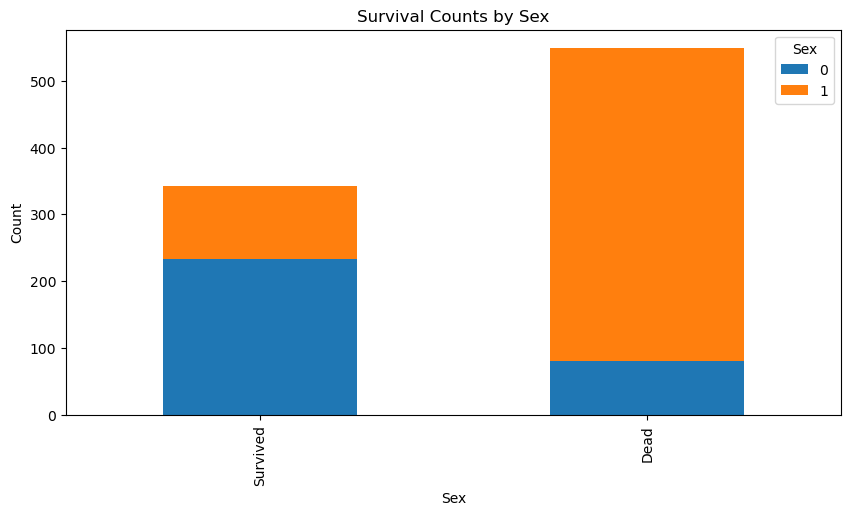

In [43]:

print("Survived:\n", df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n", df[df['Survived']==0]['Sex'].value_counts())
bar_chart('Sex')

The chart confirms that women were more likely to survive than men.

Survived:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


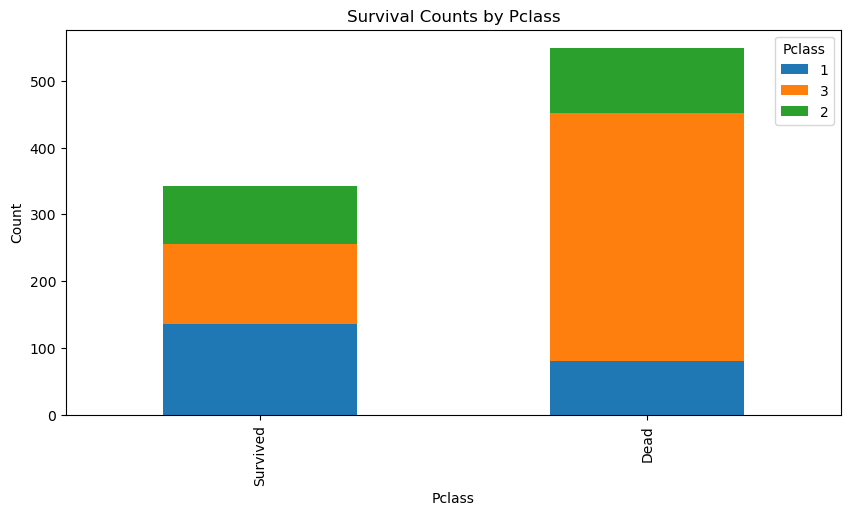

In [44]:
print("Survived:\n", df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n", df[df['Survived']==0]['Pclass'].value_counts())
bar_chart('Pclass')

The chart confirms that passengers in 1st class were more likely to survive than those in other classes. Additionally, it confirms that passengers in 3rd class were more likely to die than those in other classes.

Survived:
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


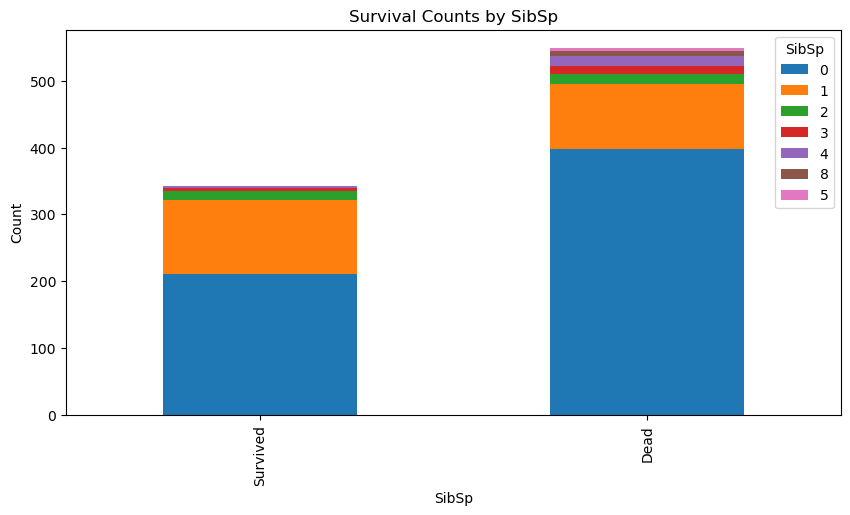

In [45]:
print('Survived:\n',df[df['Survived']==1]['SibSp'].value_counts())
print('Dead:\n',df[df['Survived']==0]['SibSp'].value_counts())
bar_chart('SibSp')

Survived:
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


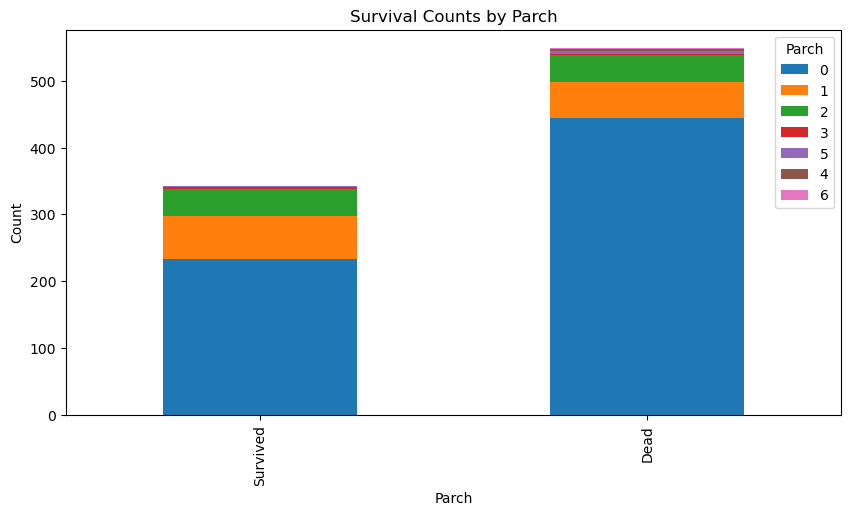

In [46]:
print('Survived:\n',df[df['Survived']==1]['Parch'].value_counts())
print('Dead:\n',df[df['Survived']==0]['Parch'].value_counts())
bar_chart('Parch')

The chart confirms that a person who boarded with more than 2 parents or children was more likely to survive. Conversely, it suggests that a person who boarded alone was more likely to die.

Survived:
 Embarked
2    219
0     93
1     30
Name: count, dtype: int64
Dead:
 Embarked
2    427
0     75
1     47
Name: count, dtype: int64


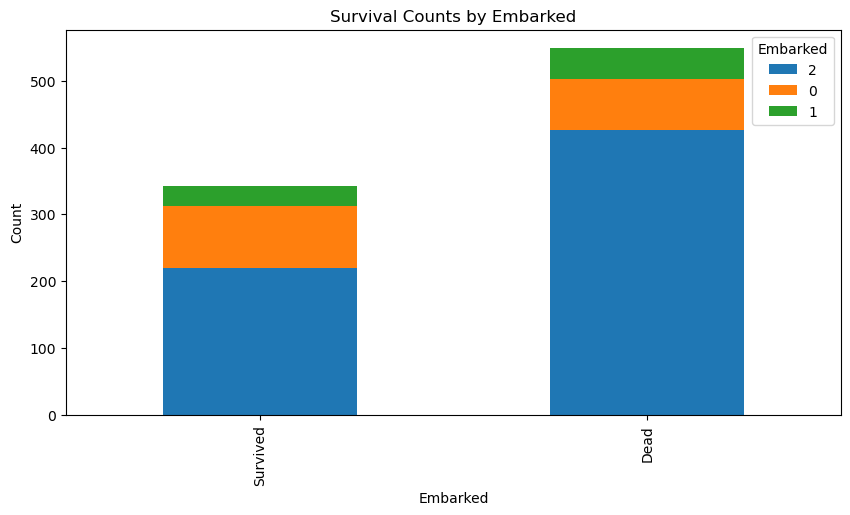

In [47]:
print('Survived:\n',df[df['Survived']==1]['Embarked'].value_counts())
print('Dead:\n',df[df['Survived']==0]['Embarked'].value_counts())
bar_chart('Embarked')

The chart indicates that a person who boarded from C was slightly more likely to survive. Conversely, it suggests that a person who boarded from Q was more likely to die, as well as a person who boarded from S.

# pairplot

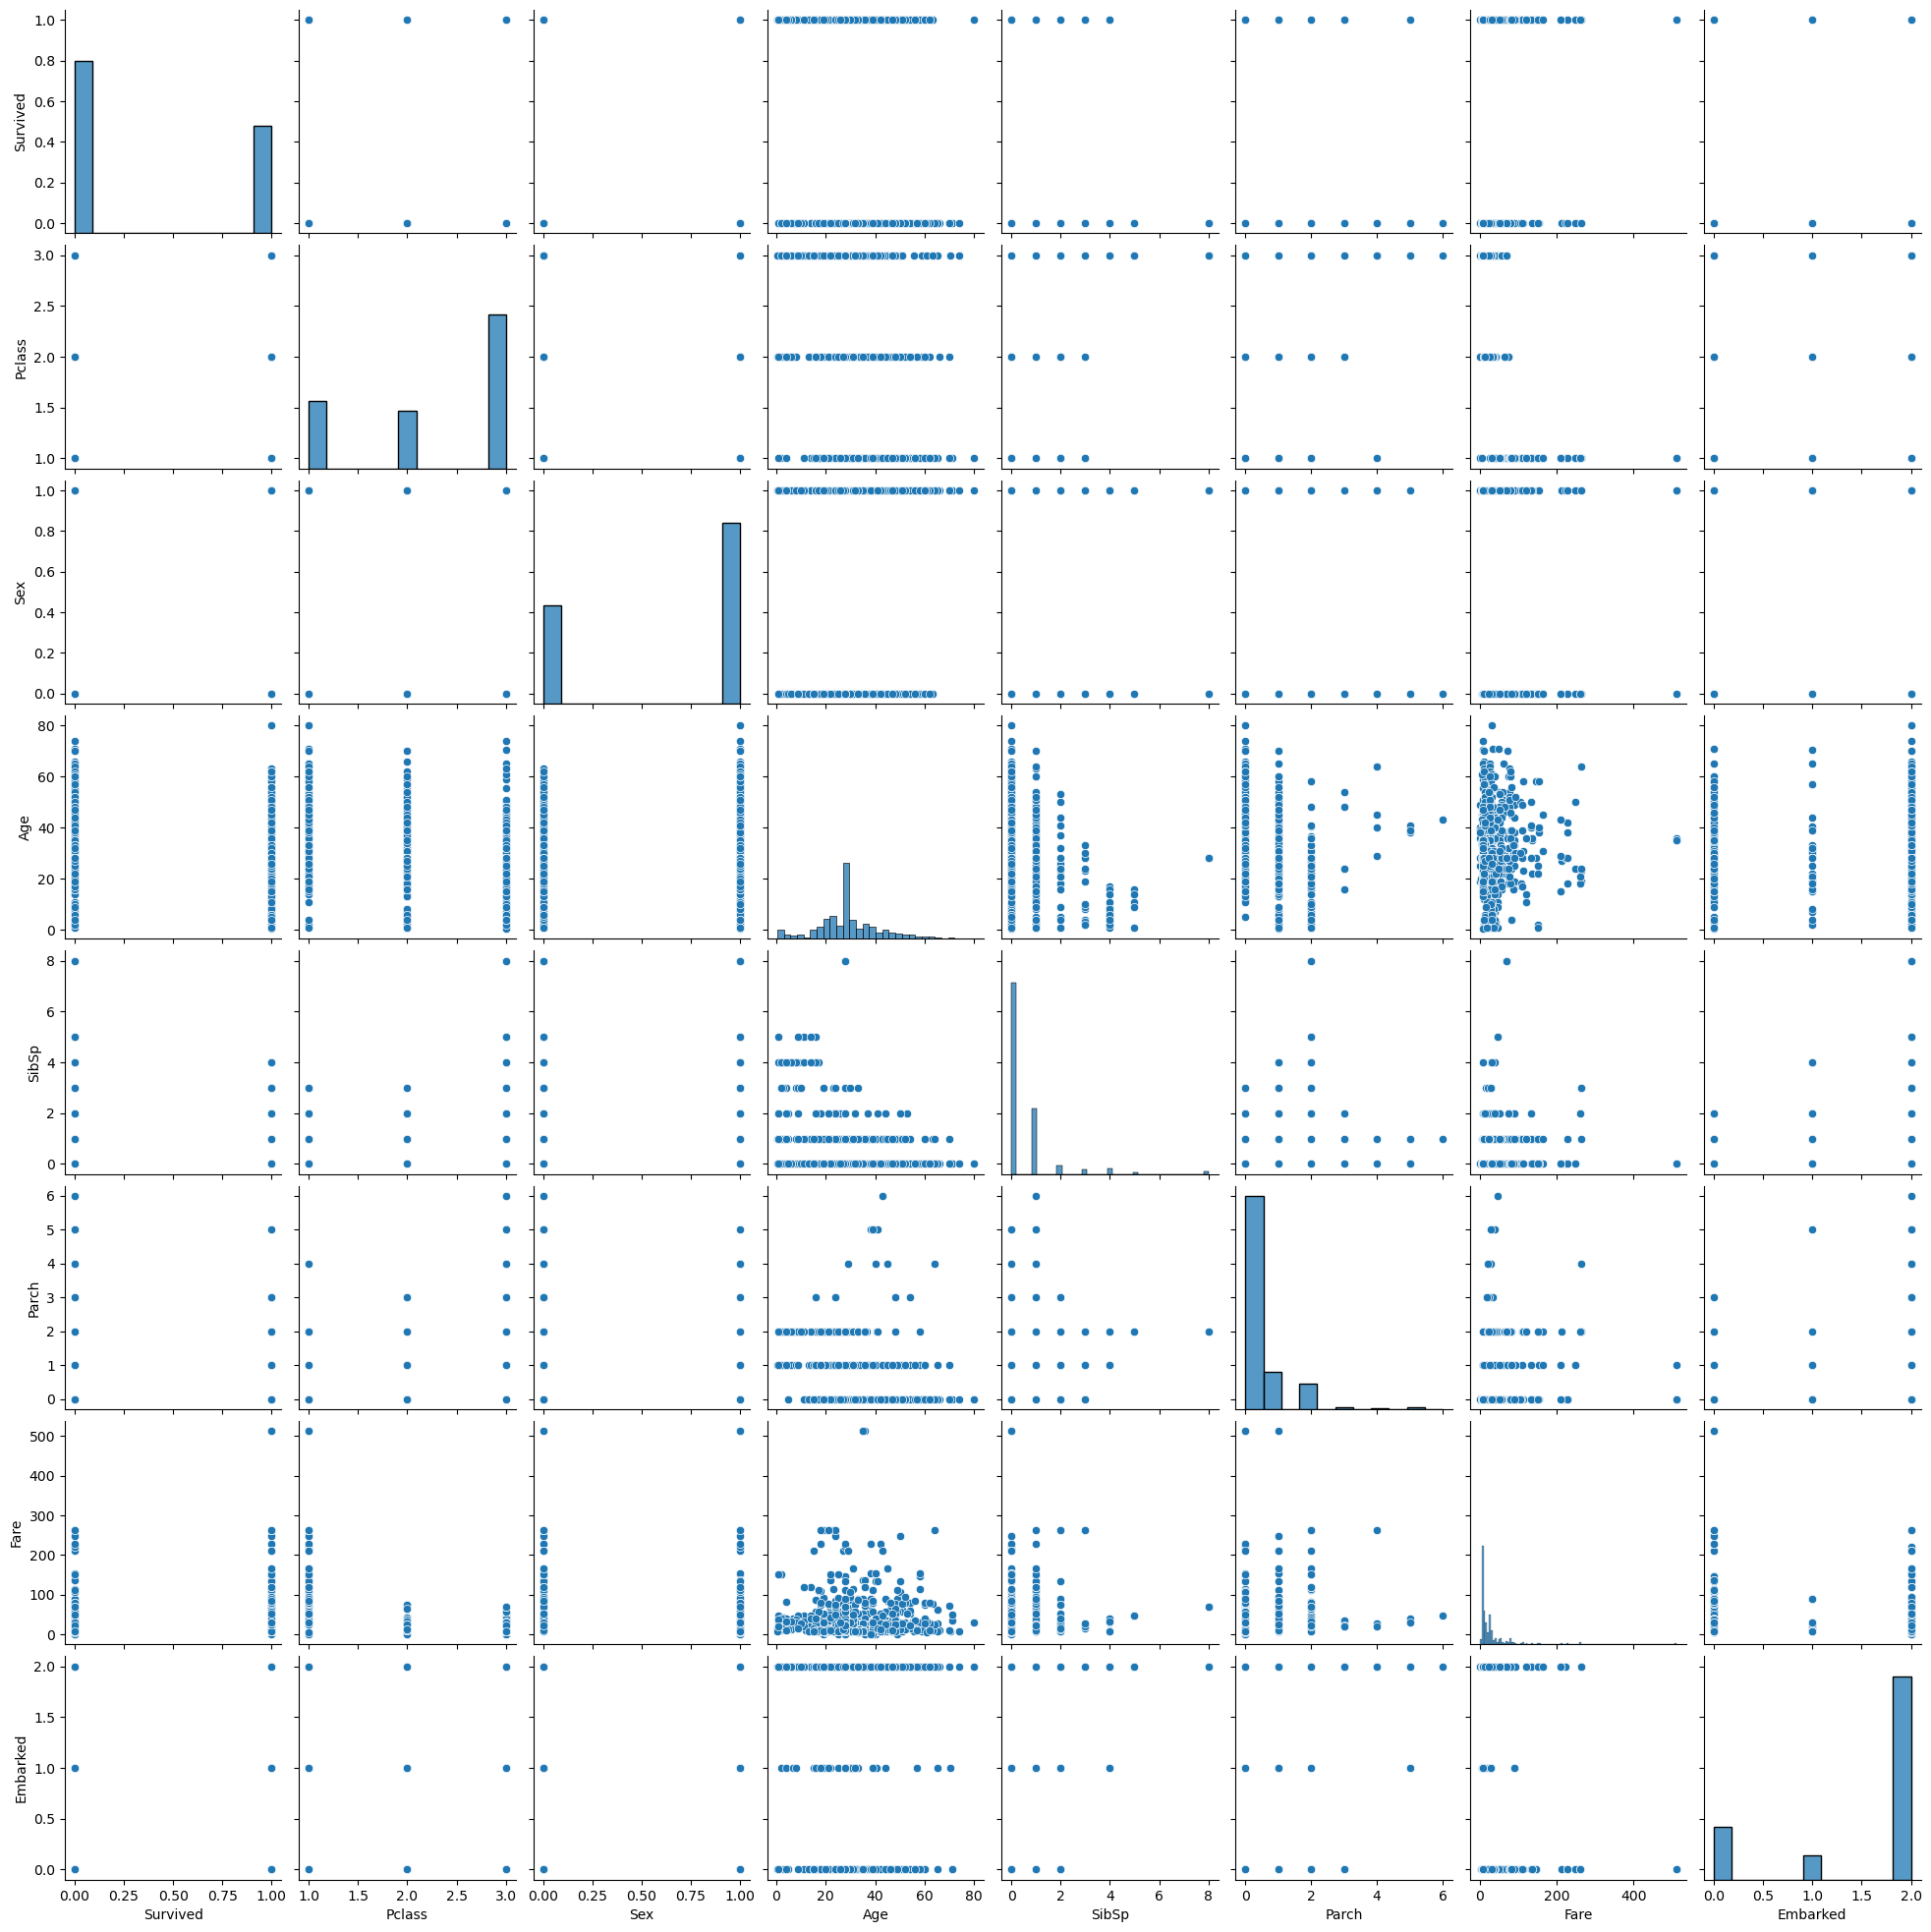

In [48]:
sns.pairplot(df)
plt.show()

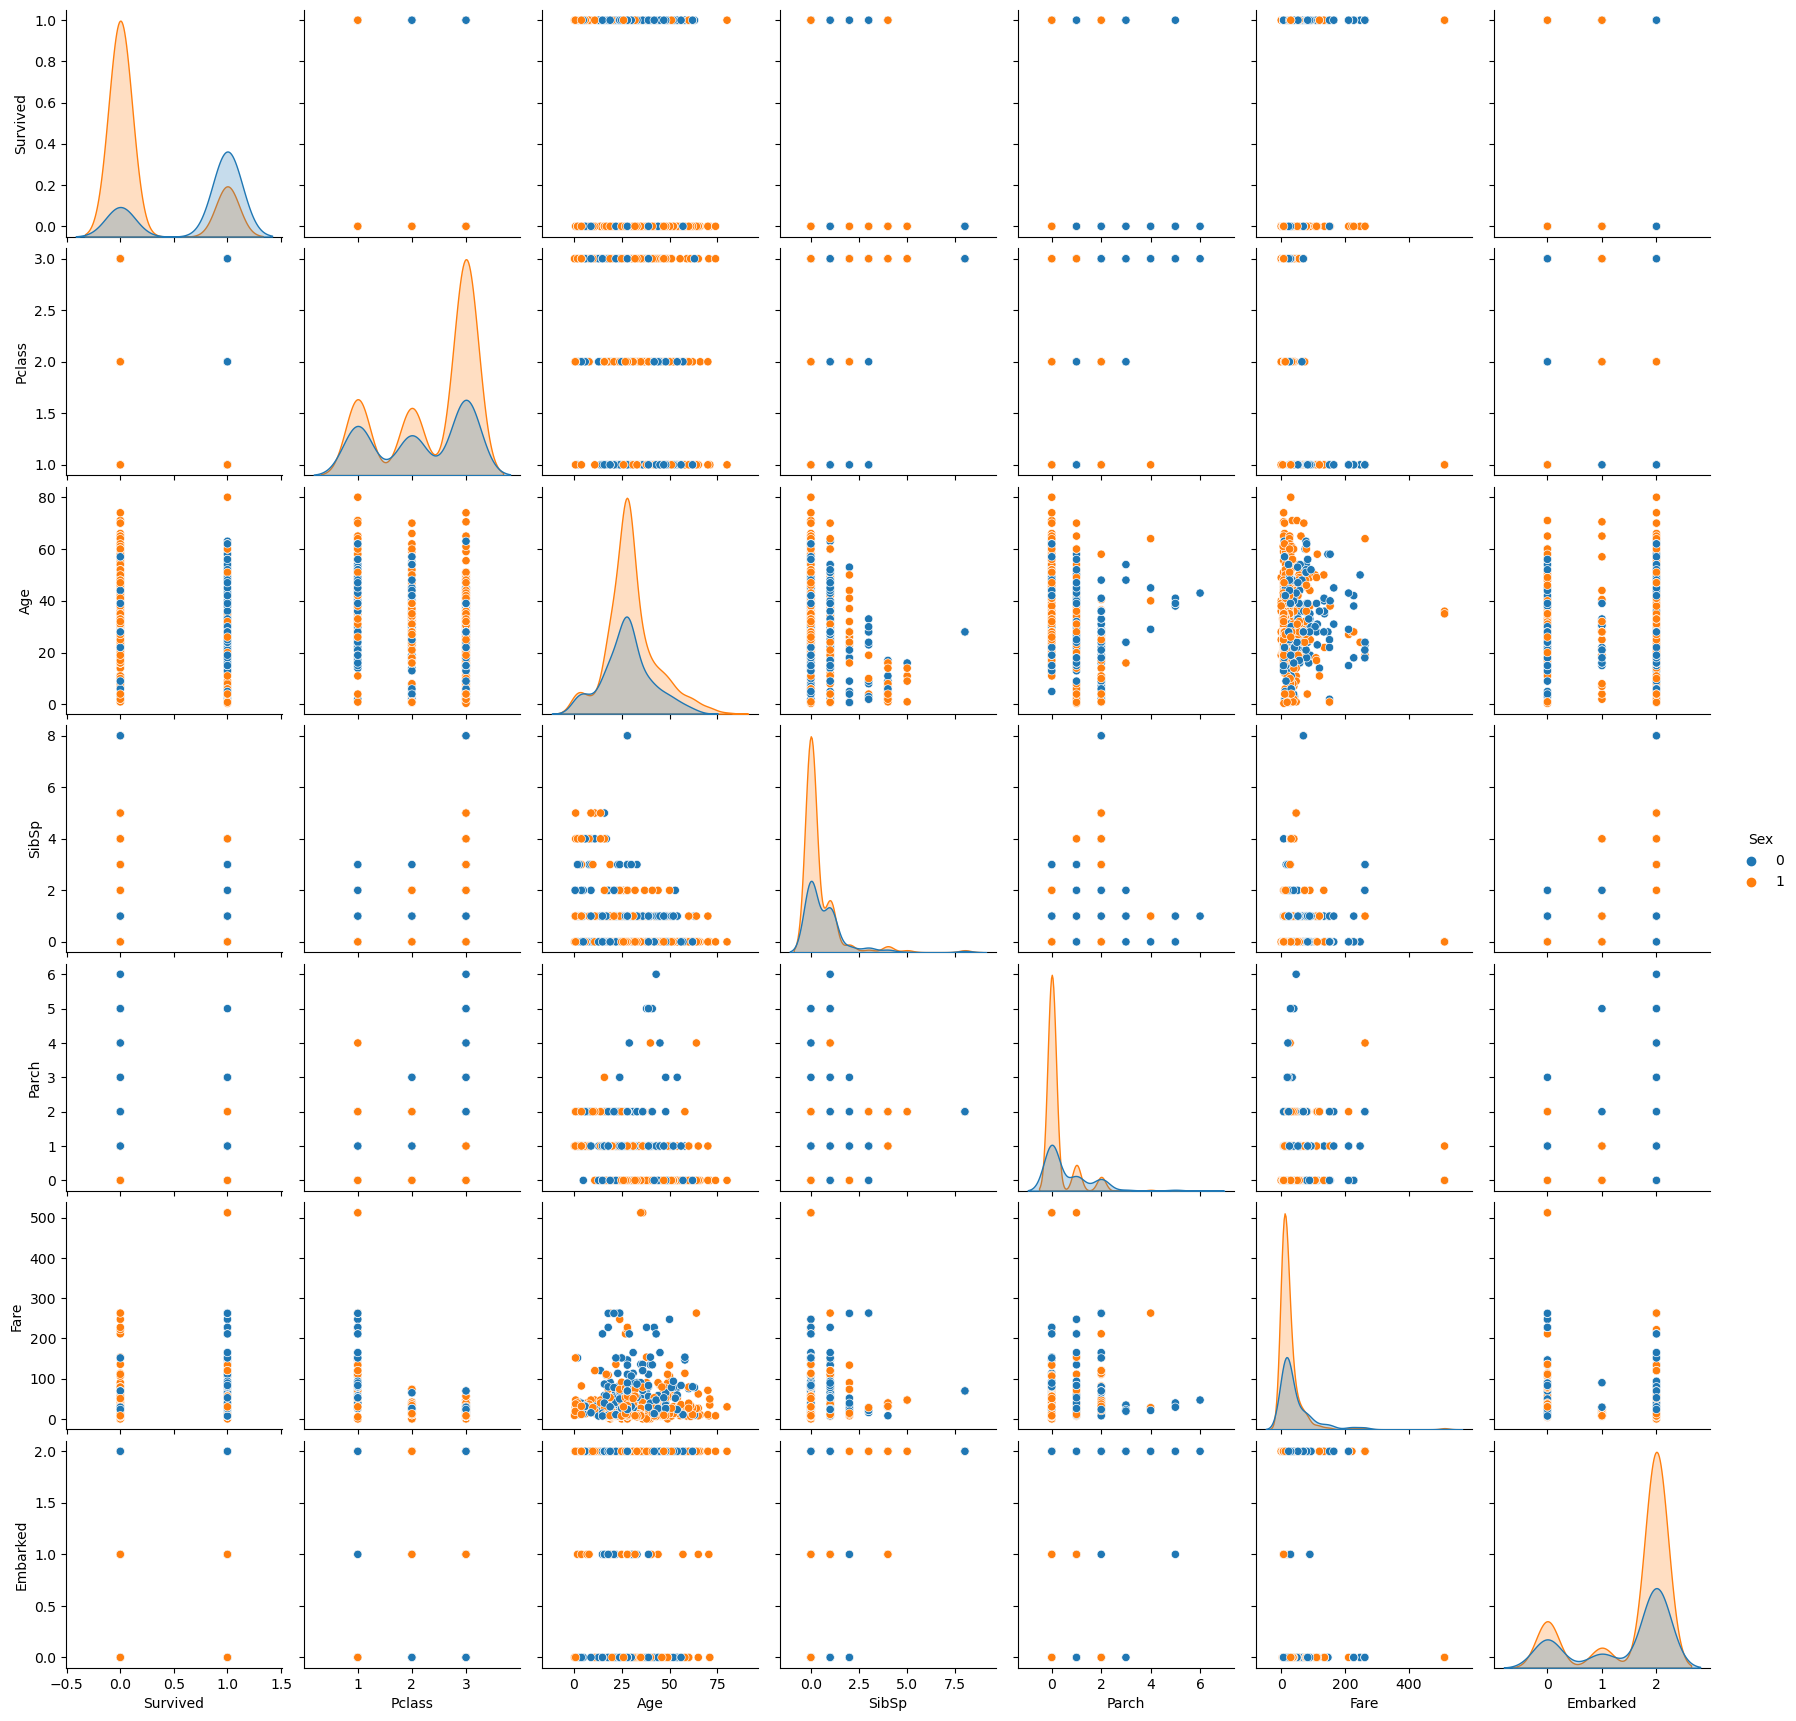

In [49]:
sns.pairplot(df, hue='Sex')
plt.show()

In [50]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='PuBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [51]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='RdBu_r')

# Boxplot

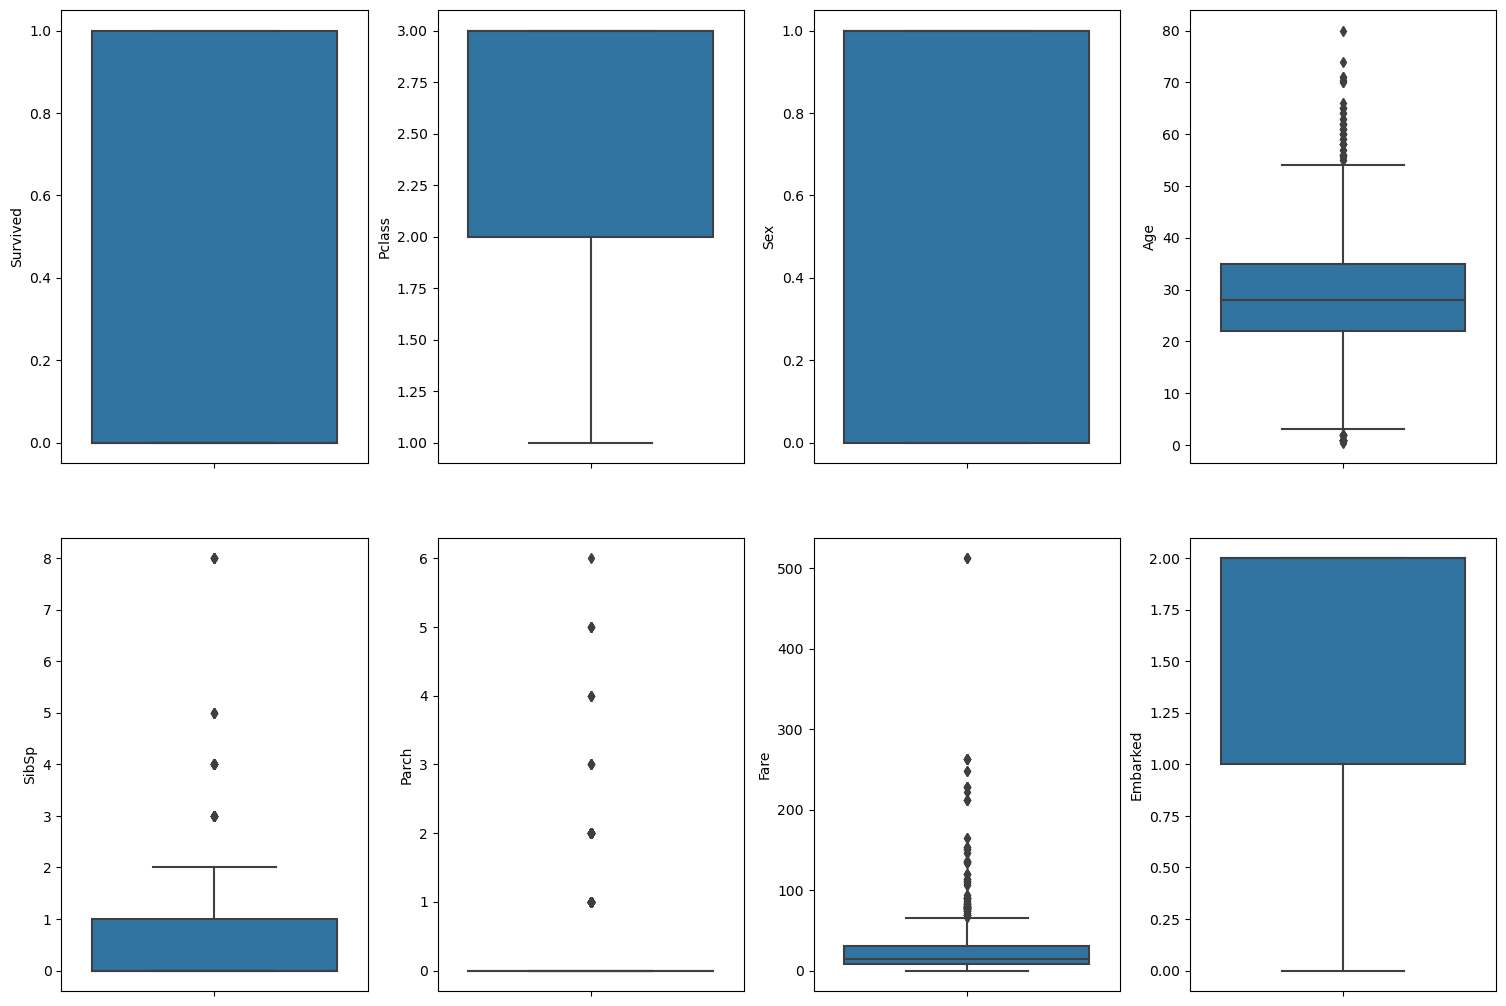

In [52]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The boxplot above provides clear details on the whiskers and outliers. While continuous outlier not considering , single values that are far away from the boxplot whiskers may require treatment based on further analysis. Currently, the focus is on retaining as much data as possible within the given dataset.

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [53]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<Axes: >

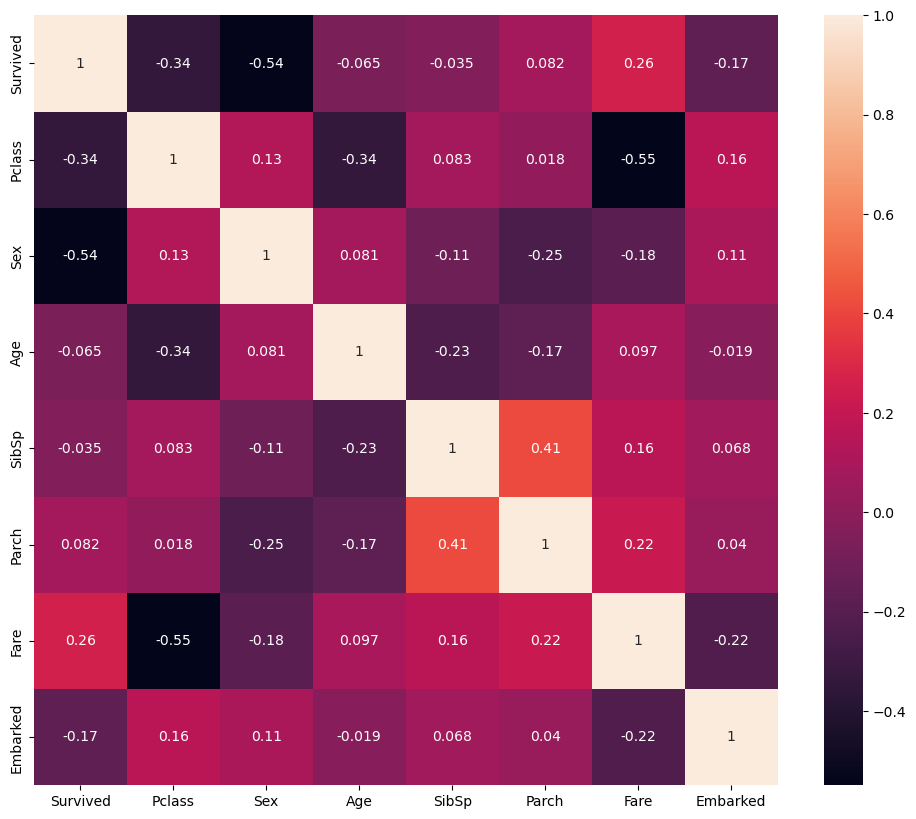

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Based on the correlation heatmap, it's evident that our target label exhibits both positive and negative correlations with other columns in the dataset.

# Outlier removal

In [55]:
df.shape

(891, 8)

In [56]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Z-score method to remove outliers from our dataset that fall outside the acceptable range of +/-0.5 skewness value.

In [57]:
df.shape

(820, 8)

In [58]:
# Percentage of Data Loss

data_loss=(891-820)/891*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

7.968574635241302

After removing the outliers, we're assessing the data loss percentage by comparing the number of rows in our original dataset with the new dataset after outlier removal. The data loss percentage should not exceed 10 percent.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [59]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

In [60]:
X 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


# Feature Scaling

In [61]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,0.722036,-0.611926,1.051956,-0.451141,-0.623707,0.583162
1,-1.586804,-1.384973,0.703210,1.051956,-0.451141,1.525109,-1.953669
2,0.833995,-1.384973,-0.283142,-0.563407,-0.451141,-0.601055,0.583162
3,-1.586804,-1.384973,0.456622,1.051956,-0.451141,0.914918,0.583162
4,0.833995,0.722036,0.456622,-0.563407,-0.451141,-0.596861,0.583162
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.563407,-0.451141,-0.430749,0.583162
816,-1.586804,-1.384973,-0.858515,-0.563407,-0.451141,0.139733,0.583162
817,0.833995,-1.384973,-0.118750,1.051956,3.088912,-0.080071,0.583162
818,-1.586804,0.722036,-0.283142,-0.563407,-0.451141,0.139733,-1.953669


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Creating the training and testing data sets

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Machine Learning Model for Classification and Evaluation Metrics

In [63]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    print('Model Name:-',model)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [64]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Model Name:- LogisticRegression()
Accuracy Score: 79.26829268292683

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       101
           1       0.75      0.70      0.72        63

    accuracy                           0.79       164
   macro avg       0.78      0.77      0.78       164
weighted avg       0.79      0.79      0.79       164


Confusion Matrix:
 [[86 15]
 [19 44]]

Cross Validation Score: 79.02439024390245

Accuracy Score - Cross Validation Score is 0.24390243902438158


In [65]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Model Name:- RandomForestClassifier(max_depth=15, random_state=111)
Accuracy Score: 79.8780487804878

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       101
           1       0.73      0.75      0.74        63

    accuracy                           0.80       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.80      0.80      0.80       164


Confusion Matrix:
 [[84 17]
 [16 47]]

Cross Validation Score: 80.60975609756098

Accuracy Score - Cross Validation Score is -0.7317073170731732


In [66]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Model Name:- ExtraTreesClassifier()
Accuracy Score: 80.48780487804879

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       101
           1       0.73      0.78      0.75        63

    accuracy                           0.80       164
   macro avg       0.79      0.80      0.80       164
weighted avg       0.81      0.80      0.81       164


Confusion Matrix:
 [[83 18]
 [14 49]]

Cross Validation Score: 78.65853658536585

Accuracy Score - Cross Validation Score is 1.82926829268294


In [67]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Model Name:- KNeighborsClassifier(n_neighbors=15)
Accuracy Score: 82.3170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       101
           1       0.80      0.71      0.76        63

    accuracy                           0.82       164
   macro avg       0.82      0.80      0.81       164
weighted avg       0.82      0.82      0.82       164


Confusion Matrix:
 [[90 11]
 [18 45]]

Cross Validation Score: 79.51219512195122

Accuracy Score - Cross Validation Score is 2.8048780487804805


In [68]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Model Name:- SVC(gamma='auto', random_state=42)
Accuracy Score: 81.09756097560977

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       101
           1       0.81      0.67      0.73        63

    accuracy                           0.81       164
   macro avg       0.81      0.78      0.79       164
weighted avg       0.81      0.81      0.81       164


Confusion Matrix:
 [[91 10]
 [21 42]]

Cross Validation Score: 81.70731707317073

Accuracy Score - Cross Validation Score is -0.609756097560961


In [69]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Model Name:- DecisionTreeClassifier(max_depth=15, random_state=21)
Accuracy Score: 79.26829268292683

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       101
           1       0.74      0.71      0.73        63

    accuracy                           0.79       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.79      0.79      0.79       164


Confusion Matrix:
 [[85 16]
 [18 45]]

Cross Validation Score: 76.46341463414635

Accuracy Score - Cross Validation Score is 2.8048780487804805


In [70]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Model Name:- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy Score: 79.8780487804878

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.77      0.68      0.72        63

    acc

Based on the provided evaluation metrics, the best performing model among the options appears to be the KNeighborsClassifier with an accuracy score of 82.32%. This model also demonstrates a relatively balanced performance across precision, recall, and F1-score for both classes. Additionally, it has the highest cross-validation score compared to the other models, indicating robustness in its performance on unseen data.

# Hyper parameter tuning on the best ML Model

In [71]:
parameters = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
}

In [72]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [73]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [74]:
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'n_neighbors': 15,
 'weights': 'uniform'}

In [75]:
final_model_2=KNeighborsClassifier(algorithm='ball_tree',leaf_size=40,n_neighbors=15,weights='uniform')
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

82.3170731707317


Plotting ROC and AUC for all the models used
from sklearn import metrics

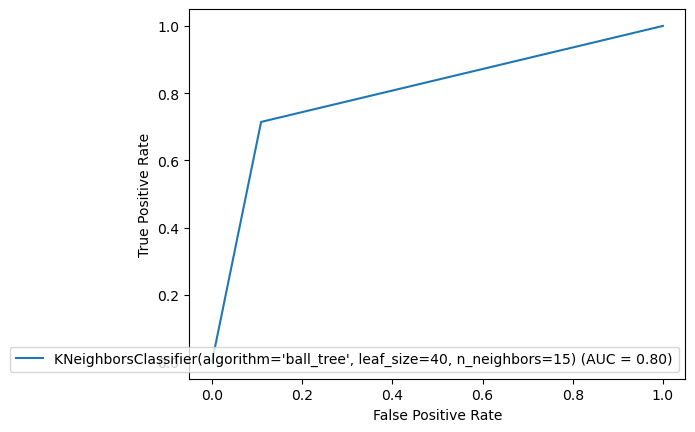

In [76]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model_2)
display.plot()

# Saving the model

In [77]:
import joblib

filename = "FinalModel_5.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_5.pkl']

In [78]:
model=joblib.load("FinalModel_5.pkl")

prediction=model.predict(X_test)
prediction

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [79]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


In [80]:
df.tail()

,Predicted,Original
159,1,1
160,0,0
161,1,0
162,0,0
163,1,1
